In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [44]:
test_y_df = pd.read_csv('./datasets/titanic_gender.csv', encoding='utf-8')
test_df = pd.read_csv('./datasets/titanic_test.csv', encoding='utf-8')
train_df =pd.read_csv('./datasets/titanic_train.csv', encoding='utf-8')



In [45]:
train = train_df[['Pclass','Sex', 'Age', 'Survived']]
test = test_df[['Pclass','Sex', 'Age']]
test_y = test_y_df['Survived']

In [46]:
train.isnull().sum()

Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

In [47]:
train = train.dropna(axis=0)

In [48]:
# Sex Label encoding
encoder = LabelEncoder()
data = encoder.fit_transform(train['Sex'])
train['Sex'] = data

In [49]:
# Age Scaling
scaler = MinMaxScaler()
scaler.fit(train[['Age']])
data = scaler.transform(train[['Age']])
train['Age'] = data


In [50]:

X =train.drop('Survived', axis=1)
y =train['Survived']
lr = LogisticRegression()
lr.fit(X, y)


LogisticRegression()

In [51]:
# Test data 전처리 

test = test.fillna(np.mean(test['Age']))
test.isnull().sum()
encoder = LabelEncoder()
data = encoder.fit_transform(test['Sex'])
test['Sex']=data

scaler = MinMaxScaler()
scaler.fit(test[['Age']])
data = scaler.transform(test[['Age']])
test['Age'] = data


In [52]:
pred = lr.predict(test)

In [53]:
test

,Pclass,Sex,Age
0,3,1,0.452723
1,3,0,0.617566
2,2,1,0.815377
3,3,1,0.353818
4,3,0,0.287881
...,...,...,...
413,3,1,0.396975
414,1,0,0.512066
415,3,1,0.505473
416,3,1,0.396975


### accuracy_score, recall_score, precision_score, F1_score,confusion_matrix, precision_recall_curve

#### sklearn.metrics.accuracy_score
* sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

#### sklearn.metrics.recall_score
* sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

#### sklearn.metrics.precision_score
* sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

#### sklearn.metrics.f1_score
* sklearn.metrics.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

#### sklearn.metrics.confusion_matrix
* sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

#### sklearn.metrics.precision_recall_curve
* sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None, drop_intermediate=False)

In [54]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [57]:
def get_eval(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1score = f1_score(y_test, pred)
    matrix = confusion_matrix(y_test, pred)

    print(f'혼동행렬은 : {matrix} ')
    print(f'정확도 : {accuracy}, 재현율 : {recall}, 정밀도 : {precision}, f1스코어 : {f1score}')

In [58]:
get_eval(test_y, pred)

혼동행렬은 : [[252  14]
 [ 10 142]] 
정확도 : 0.9425837320574163, 재현율 : 0.9342105263157895, 정밀도 : 0.9102564102564102, f1스코어 : 0.922077922077922


In [59]:
pred_proba = lr.predict_proba(test)

In [60]:
pred = lr.predict(test)

In [62]:
pred_proba[:5]

array([[0.92140531, 0.07859469],
       [0.59987979, 0.40012021],
       [0.88759265, 0.11240735],
       [0.90468156, 0.09531844],
       [0.42576367, 0.57423633]])

In [63]:
pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

### precision_recall_curve

In [65]:
len(pred_proba)

418

In [69]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(test_y, pred_proba[:,1])

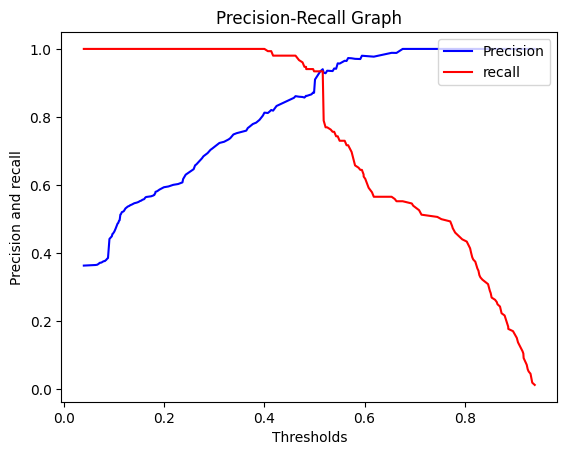

In [73]:
import matplotlib.pyplot as plt

plt.title("Precision-Recall Graph")
plt.xlabel("Thresholds"   )
plt.ylabel("Precision and recall")
plt.plot(thresholds, precisions[:194], "b", label = "Precision" )
plt.plot(thresholds, recalls[:194], "r", label = "recall")
plt.legend(loc = "upper right")
plt.show()